In [1]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
#from torch.autograd import Variable
import torch.optim as optim

In [2]:
N = 200
x = np.random.rand(N)*30-15
y = 2*x + np.random.randn(N)*5
 
# float32型にしておく
x = x.astype(np.float32)
y = y.astype(np.float32)

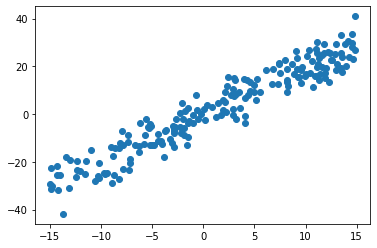

In [3]:
plt.scatter(x,y)

## 自動微分による最小二乗法

In [4]:
x = torch.from_numpy(x)
y = torch.from_numpy(y)

In [5]:
w = torch.tensor([1.0,0.0], requires_grad = True)

In [6]:
w.grad

In [7]:
lr = 1.0e-4
 
# 変数を初期化します
#w = torch.tensor(1.0, requires_grad=True)
#b = torch.tensor(0.0, requires_grad=True)
 
losses = []
for epoch in range(3000):
    # 線形モデルによる値の予測
    p = w[0]*x + w[1]
    
    # 損失値と自動微分
    loss = ((p-y)**2).mean()
    loss.backward()
    
    # グラディエントを使って変数`w`と`b`の値を更新する。
    with torch.no_grad():
        w[0] -= w.grad[0] * lr
        w[1] -= w.grad[1] * lr
        w.grad.zero_()
        
    # グラフ描画用
    losses.append(loss.item())
    
print('loss = ', loss.item())
print('w    = ', w[0].item())
print('b    = ', w[1].item())

loss =  26.27545928955078
w    =  1.962525725364685
b    =  -0.11894846707582474


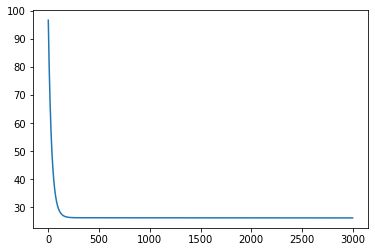

In [8]:
plt.plot(losses)

## Adamによる最小二乗法

In [9]:
w = torch.tensor([1.0,0.0], requires_grad = True)

In [18]:
optimizer = optim.Adam([w])

In [19]:
losses = []
for i in range(2000):
    optimizer.zero_grad()
    p = w[0]*x+w[1]
    loss = ((p-y)**2).mean()
    losses.append(loss)
    loss.backward()
    optimizer.step()
    
    with torch.no_grad(): #不等式制約の入れ方
        #for param in model.parameters():
        w[0].clamp_(-1, 1.9)

            
print(w,b)

tensor([ 1.9000, -0.1758], requires_grad=True) tensor(-0.1758, requires_grad=True)


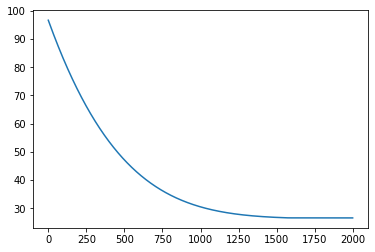

In [20]:
plt.plot(losses)

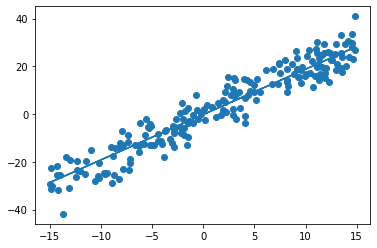

In [22]:
plt.scatter(x,y)
plt.plot(x,w[0].to('cpu').detach().numpy()*x.to('cpu').detach().numpy()+w[1].to('cpu').detach().numpy())

In [23]:
#参考？
class tempModel(nn.Module):
    def __init__(self, A, x, b):
        super().__init__()
        weights = x

        self.A = A
        self.b = b

        self.weights = nn.Parameter(torch.Tensor(weights), requires_grad=True)

    def forward(self):
        ret = torch.matmul(self.A, self.x)
        ret += self.b

        return ret

    def training_loop(model, optimizer, n=100):
        loss_fn = nn.MSELoss()
        for param in model.parameters():
            param.requires_grad_(True)

        for i in range(n):
            preds = model()
            loss = loss_fn(torch.Tensor([preds]), torch.Tensor([0]))
            loss.requires_grad_(True)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        loss.requires_grad_(False)

        for param in model.parameters():
            param.requires_grad_(False)
            return param.data